In [34]:
import numpy as np

# **Q1**

In [35]:
# Q1(a)
a = np.random.randint(10,101,size=(5,5))
a

array([[50, 62, 56, 74, 56],
       [85, 69, 21, 70, 96],
       [31, 14, 83, 91, 53],
       [90, 13, 69, 85, 56],
       [19, 27, 12, 75, 82]])

In [36]:
#(b)
new_a = np.where(a%2 == 0,-1,a)
new_a

array([[-1, -1, -1, -1, -1],
       [85, 69, 21, -1, -1],
       [31, -1, 83, 91, 53],
       [-1, 13, 69, 85, -1],
       [19, 27, -1, 75, -1]])

In [37]:
#(c)
row_sum = np.sum(a,axis=1)
col_sum = np.sum(a,axis=0)
row_mean = np.mean(a,axis=1)
col_mean = np.mean(a,axis=0)
print(row_sum)
print(col_sum)
print(row_mean)
print(col_mean)

[298 341 272 313 215]
[275 185 241 395 343]
[59.6 68.2 54.4 62.6 43. ]
[55.  37.  48.2 79.  68.6]


In [38]:
#(d)
flatt = a.flatten()
sort = np.sort(flatt)[::-1]
print(flatt)
print(sort)

[50 62 56 74 56 85 69 21 70 96 31 14 83 91 53 90 13 69 85 56 19 27 12 75
 82]
[96 91 90 85 85 83 82 75 74 70 69 69 62 56 56 56 53 50 31 27 21 19 14 13
 12]


# **Q2**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('/content/StudentsPerformance.csv')

In [41]:
print('mean scores:')
print(data[['math score', 'reading score', 'writing score']].mean())

print('\n median scores:')
print(data[['math score', 'reading score', 'writing score']].median())

print('\n standard deviation:')
print(data[['math score', 'reading score', 'writing score']].std())

mean scores:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

 median scores:
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

 standard deviation:
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


In [42]:
data['overall_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

In [43]:
def get_result(row):
    if row['math score'] >= 40 and row['reading score'] >= 40 and row['writing score'] >= 40:
        return "Pass"
    else:
        return "Fail"

data['result'] = data.apply(get_result, axis=1)

In [44]:
group_avg = data.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score']].mean()
print("\nGroup-wise Average Scores (by gender and parental education):")
group_avg


Group-wise Average Scores (by gender and parental education):


math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
       some college                  69.009259      64.990741      63.148148
       some high school              67.840909      64.693182      61.375000

In [45]:
prep_avg = data.groupby('test preparation course')['math score'].mean()
prep_avg

,math score
test preparation course,
completed,69.695531
none,64.077882


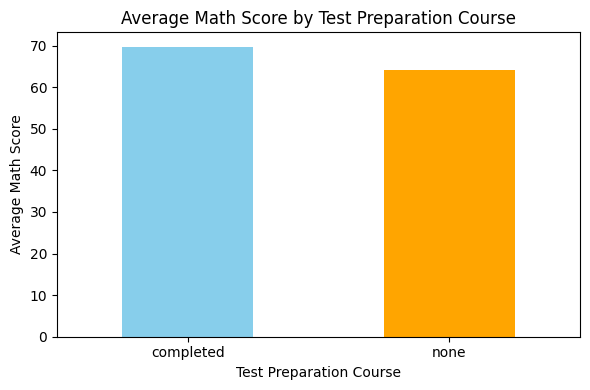

In [46]:
plt.figure(figsize=(6,4))
prep_avg.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Math Score by Test Preparation Course')
plt.ylabel('Average Math Score')
plt.xlabel('Test Preparation Course')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Q3**

In [47]:
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt

In [48]:
#(a)
A = np.array([[3, 2],[4, -1]])  #coeff. matrix A
B = np.array([16, 9]) #right hand side B
sol = linalg.solve(A, B)
print(f"x = {sol[0]}, y = {sol[1]}")

x = 3.090909090909091, y = 3.3636363636363638


In [49]:
#(b)
def f(x):
    return (x[0] - 3)**2 + 2
# initial guess
x0 = [0]

result = optimize.minimize(f, x0)
print("\n Optimization Result:")
print(f"minimum at x = {result.x[0]:.4f}")
print(f"minimum value = {result.fun:.4f}")


 Optimization Result:
minimum at x = 3.0000
minimum value = 2.0000


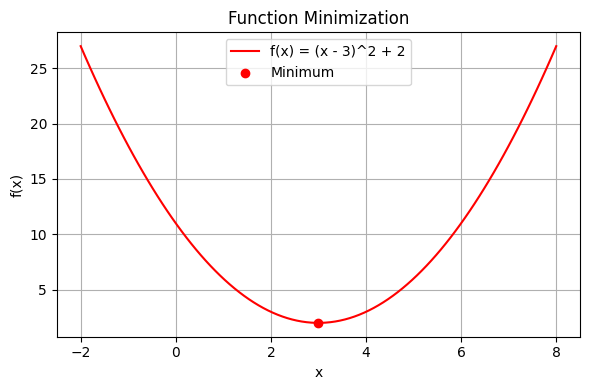

In [53]:
# function plot using Matplotlib
x_vals = np.linspace(-2, 8, 100)
y_vals = (x_vals - 3)**2 + 2

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='f(x) = (x - 3)^2 + 2', color='red')
plt.scatter(result.x, result.fun, color='red', zorder=5, label='Minimum')
plt.title("Function Minimization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Q4**

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print('Logistic Regression')
print('accuracy:', accuracy_score(y_test, log_preds))
print('confusion matrix:\n', confusion_matrix(y_test, log_preds))
print('Classification Report:\n', classification_report(y_test, log_preds))

# k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print('k-Nearest Neighbors')
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))

Logistic Regression
accuracy: 0.9666666666666667
confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

k-Nearest Neighbors
Accuracy: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00       